In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arche\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arche\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arche\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arche\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\arche\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

data = pd.read_csv("ecg_data_summary.csv")
data.head(10)

,PersonID,Age,Sex,Arrhythmia,BPM,Average_RR_Interval,Min_RR_Interval,Max_RR_Interval,PT_Interval,RR_Median,Local_RR_Intervals
0,JS00001,85.0,Male,True,55.299539,1.085000,0.48,1.76,1.085000,1.00,NaN
1,JS00002,59.0,Female,True,88.607595,0.677143,0.44,1.20,0.677143,0.64,"0.10000000000000003,0.36,0.14,0.16000000000000003"
2,JS00004,66.0,Male,True,50.119332,1.197143,0.52,2.64,1.197143,1.20,NaN
3,JS00005,73.0,Female,True,65.375303,0.917778,0.40,1.98,0.917778,0.80,NaN
4,JS00006,46.0,Female,True,71.428571,0.840000,0.48,1.62,0.840000,0.70,0.9200000000000002
5,JS00007,80.0,Female,True,76.530612,0.784000,0.38,1.46,0.784000,0.84,NaN
6,JS00008,46.0,Male,False,42.016807,1.428000,0.88,3.40,1.428000,0.94,NaN
7,JS00009,45.0,Male,True,47.619048,1.260000,0.72,1.96,1.260000,1.08,NaN
8,JS00010,47.0,Female,True,47.191011,1.271429,0.60,2.10,1.271429,1.28,NaN
9,JS00011,63.0,Male,True,79.710145,0.752727,0.38,1.08,0.752727,0.78,0.07999999999999996


## Basic Exploratory Data Analysis (EDA)

<Axes: >

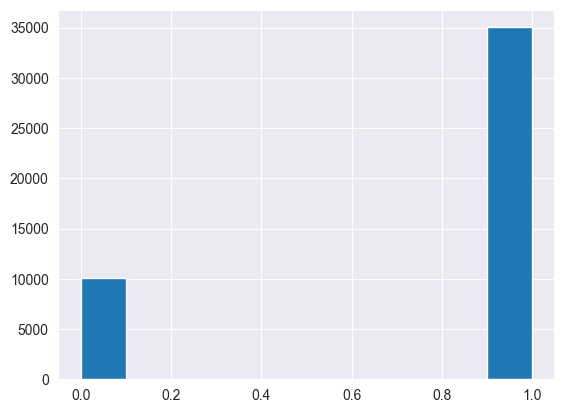

In [3]:
data["Arrhythmia"].astype(int).hist()

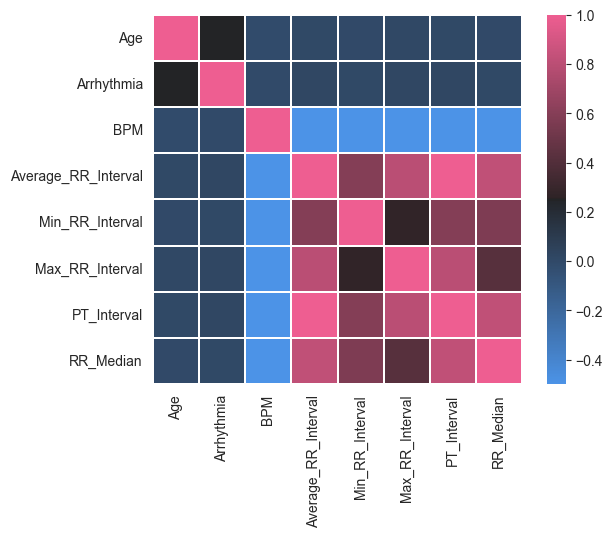

In [4]:
data["Arrhythmia"] = data["Arrhythmia"].astype(int)
numeric_data = data.select_dtypes(include=[float, int])
corr = numeric_data.corr(method="pearson")
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)
plt.show()


In [5]:
data = data[["Age", "BPM", "Average_RR_Interval", "Min_RR_Interval", "Max_RR_Interval", "PT_Interval", "RR_Median", "Arrhythmia"]]
data.head(10)


,Age,BPM,Average_RR_Interval,Min_RR_Interval,Max_RR_Interval,PT_Interval,RR_Median,Arrhythmia
0,85.0,55.299539,1.085000,0.48,1.76,1.085000,1.00,1
1,59.0,88.607595,0.677143,0.44,1.20,0.677143,0.64,1
2,66.0,50.119332,1.197143,0.52,2.64,1.197143,1.20,1
3,73.0,65.375303,0.917778,0.40,1.98,0.917778,0.80,1
4,46.0,71.428571,0.840000,0.48,1.62,0.840000,0.70,1
5,80.0,76.530612,0.784000,0.38,1.46,0.784000,0.84,1
6,46.0,42.016807,1.428000,0.88,3.40,1.428000,0.94,0
7,45.0,47.619048,1.260000,0.72,1.96,1.260000,1.08,1
8,47.0,47.191011,1.271429,0.60,2.10,1.271429,1.28,1
9,63.0,79.710145,0.752727,0.38,1.08,0.752727,0.78,1


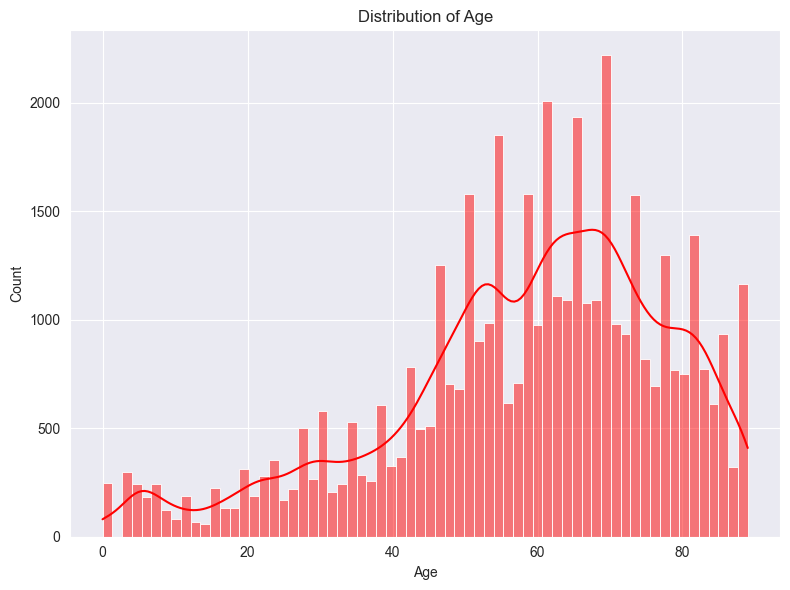

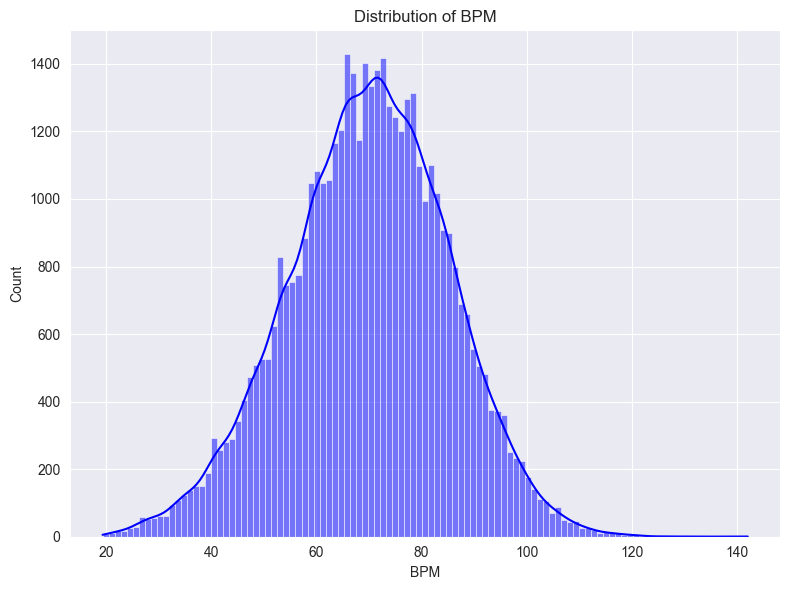

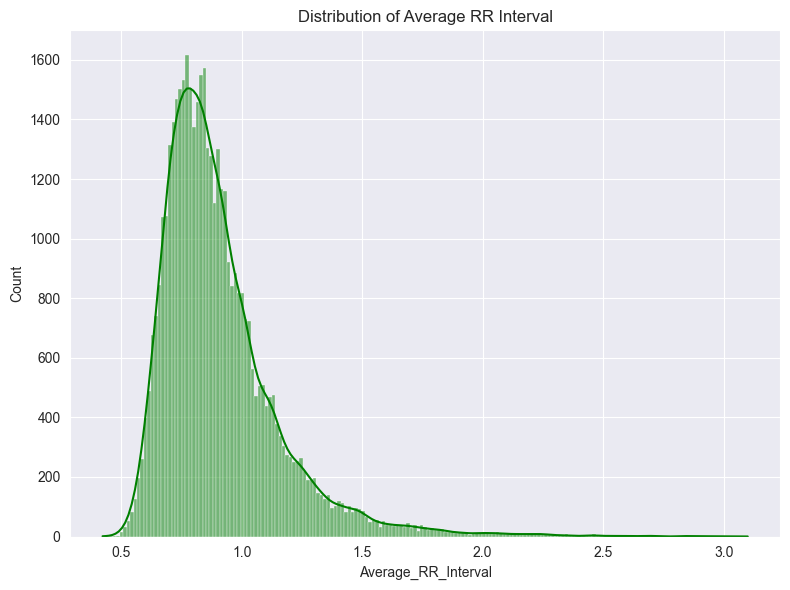

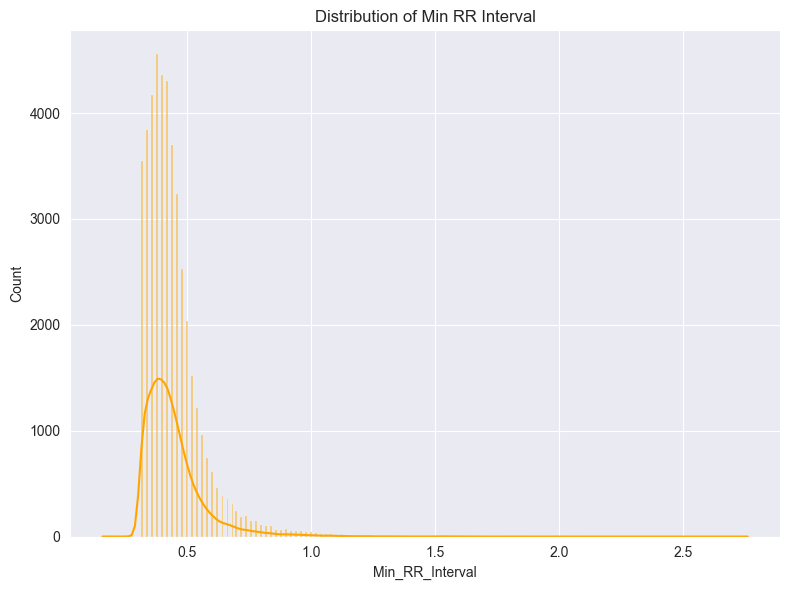

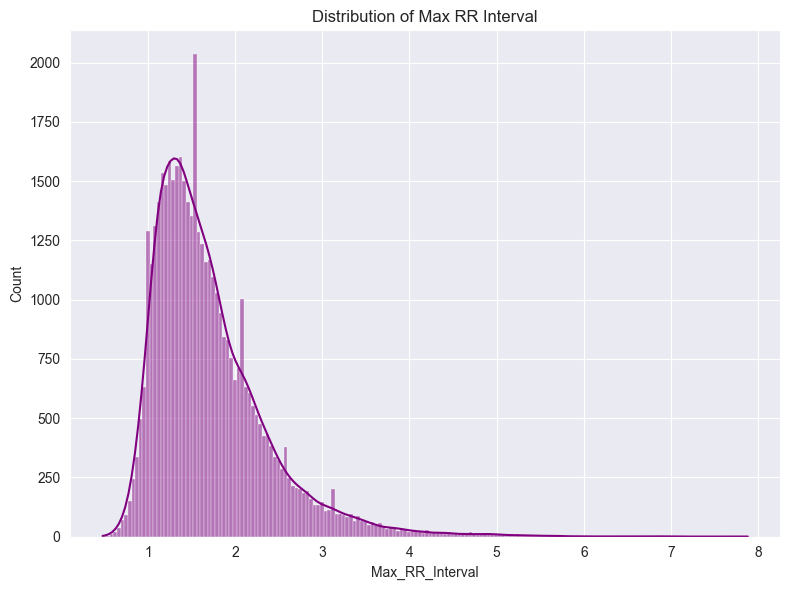

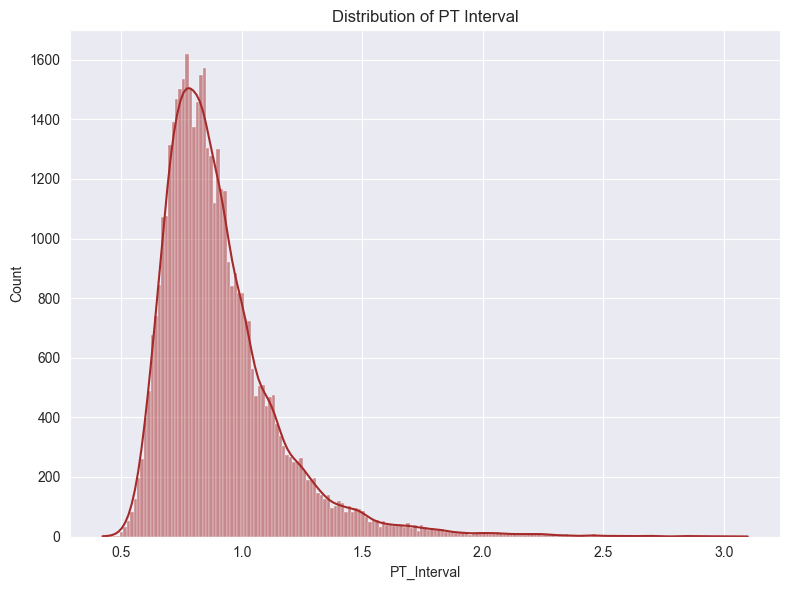

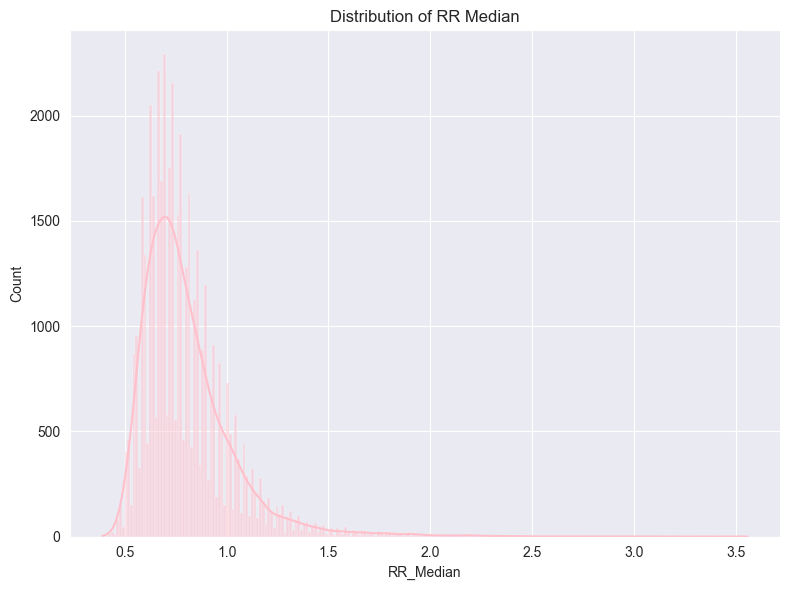

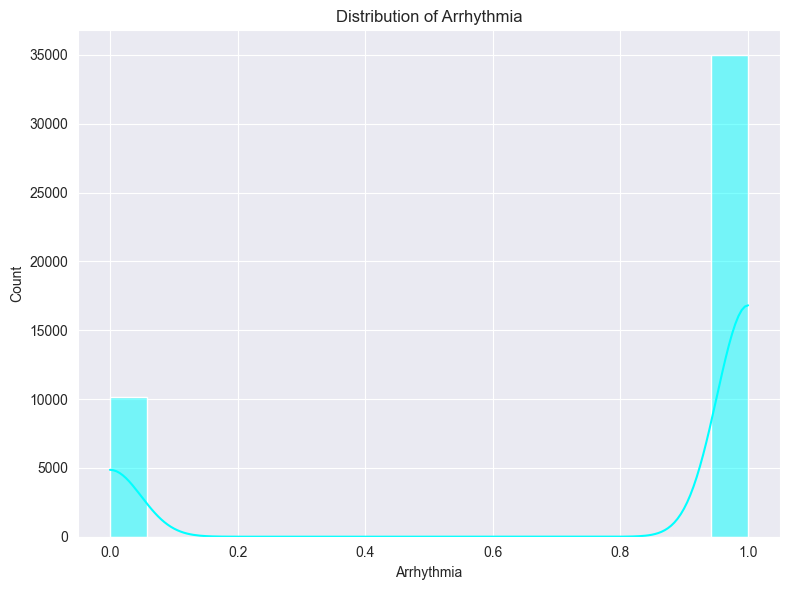

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant features
data = data[["Age", "BPM", "Average_RR_Interval", "Min_RR_Interval", 
             "Max_RR_Interval", "PT_Interval", "RR_Median", "Arrhythmia"]]

# Plot for Age
plt.figure(figsize=(8, 6))
sns.histplot(data, x="Age", kde=True, color='r')
plt.title("Distribution of Age")
plt.tight_layout()
plt.show()

# Plot for BPM
plt.figure(figsize=(8, 6))
sns.histplot(data, x="BPM", kde=True, color='b')
plt.title("Distribution of BPM")
plt.tight_layout()
plt.show()

# Plot for Average RR Interval
plt.figure(figsize=(8, 6))
sns.histplot(data, x="Average_RR_Interval", kde=True, color='g')
plt.title("Distribution of Average RR Interval")
plt.tight_layout()
plt.show()

# Plot for Min RR Interval
plt.figure(figsize=(8, 6))
sns.histplot(data, x="Min_RR_Interval", kde=True, color='orange')
plt.title("Distribution of Min RR Interval")
plt.tight_layout()
plt.show()

# Plot for Max RR Interval
plt.figure(figsize=(8, 6))
sns.histplot(data, x="Max_RR_Interval", kde=True, color='purple')
plt.title("Distribution of Max RR Interval")
plt.tight_layout()
plt.show()

# Plot for PT Interval
plt.figure(figsize=(8, 6))
sns.histplot(data, x="PT_Interval", kde=True, color='brown')
plt.title("Distribution of PT Interval")
plt.tight_layout()
plt.show()

# Plot for RR Median
plt.figure(figsize=(8, 6))
sns.histplot(data, x="RR_Median", kde=True, color='pink')
plt.title("Distribution of RR Median")
plt.tight_layout()
plt.show()

# Plot for Arrhythmia
plt.figure(figsize=(8, 6))
sns.histplot(data, x="Arrhythmia", kde=True, color='cyan')
plt.title("Distribution of Arrhythmia")
plt.tight_layout()
plt.show()


## Calculate Probabilities

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from tqdm import tqdm

data = data[["Age", "BPM", "Average_RR_Interval", "Min_RR_Interval", "Max_RR_Interval", "PT_Interval", "RR_Median", "Arrhythmia"]]

def calculate_prior(df, Y):
    prior = df[Y].value_counts(normalize=True).to_dict()
    return prior

def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    # Filter rows by class label
    df_label = df[df[Y] == label]
    
    # probability P(X | Y) for each feature value
    p_x_given_y = len(df_label[df_label[feat_name] == feat_val]) / len(df_label) if len(df_label) > 0 else 0
    return p_x_given_y

def naive_bayes_categorical(df, X, Y):
    # feature names (all columns except target Y)
    features = list(df.columns)[:-1]
    
    # Calculate prior probabilities
    prior = calculate_prior(df, Y)
    
    Y_pred = []
    
    # Loop over every test sample
    for x in tqdm(X, desc="Processing samples", unit="sample"):
        # Initialize likelihood for each label
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        
        # likelihood
        for j in range(len(labels)):
            for i in range(len(features)):
                feat_name = features[i]
                feat_val = x[i]
                likelihood[j] *= calculate_likelihood_categorical(df, feat_name, feat_val, Y, labels[j])
        
        # posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[labels[j]]
        
        # Predict maximum posterior probability
        Y_pred.append(labels[np.argmax(post_prob)])
    
    return np.array(Y_pred)

# training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=41)

# Prepare features (X) and target (Y) for testing
X_test = test.iloc[:, :-1].values  # All columns except 'Arrhythmia'
Y_test = test.iloc[:, -1].values   # The 'Arrhythmia' column

# Train the Naive Bayes model
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Arrhythmia")

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred))
print("\nF1 Score:")
print(f1_score(Y_test, Y_pred))
print("\nPrecision:")
print(precision_score(Y_test, Y_pred))
print("\nRecall:")
print(recall_score(Y_test, Y_pred))


Processing samples:   0%|          | 0/9031 [00:00<?, ?sample/s]

Processing samples: 100%|██████████| 9031/9031 [01:54<00:00, 78.87sample/s]

Confusion Matrix:
[[ 597 1431]
 [1524 5479]]

Accuracy Score:
0.6727937105525412

F1 Score:
0.7876087112772228

Precision:
0.7929088277858176

Recall:
0.7823789804369556


In [10]:
# Gaussian Model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from tqdm import tqdm

data = data[["Age", "BPM", "Average_RR_Interval", "Min_RR_Interval", "Max_RR_Interval", "PT_Interval", "RR_Median", "Arrhythmia"]]

def calculate_prior(df, Y):
    return df[Y].value_counts(normalize=True).to_dict()

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    df_label = df[df[Y] == label]
    mean = df_label[feat_name].mean()
    std = df_label[feat_name].std()
    
    if std == 0:
        return 1.0 if feat_val == mean else 0.0
    
    exponent = np.exp(-((feat_val - mean) ** 2) / (2 * std ** 2))
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    return p_x_given_y

def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns[:-1])
    prior = calculate_prior(df, Y)
    labels = sorted(df[Y].unique())
    
    Y_pred = []
    
    for x in tqdm(X, desc="Processing samples", unit="sample"):
        likelihood = [1.0] * len(labels)
        
        for j in range(len(labels)):
            for i in range(len(features)):
                feat_name = features[i]
                feat_val = x[i]
                likelihood[j] *= calculate_likelihood_gaussian(df, feat_name, feat_val, Y, labels[j])
        
        post_prob = [likelihood[j] * prior[labels[j]] for j in range(len(labels))]
        
        Y_pred.append(labels[np.argmax(post_prob)])
    
    return np.array(Y_pred)

train, test = train_test_split(data, test_size=0.2, random_state=41)

X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Arrhythmia")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred))
print("\nF1 Score:")
print(f1_score(Y_test, Y_pred))
print("\nPrecision:")
print(precision_score(Y_test, Y_pred))
print("\nRecall:")
print(recall_score(Y_test, Y_pred))


Processing samples: 100%|██████████| 9031/9031 [03:01<00:00, 49.89sample/s]

Confusion Matrix:
[[ 307 1721]
 [ 470 6533]]

Accuracy Score:
0.7573912080611228

F1 Score:
0.8563937864586747

Precision:
0.7914950327114126

Recall:
0.9328859060402684
